In [1]:
import os
import pandas as pd

### Etapes à suivre pour construire un modèle de prédiction
- Récolter les données
- Nettoyer et préparer les données: elle permet d'aboutir à un jeu de données sur lequel entraîné un algorithme
- Vectorisation: Représenter les mots en vecteurs
- Splitting du dataset en TestSet et TrainingSet
- Entraîné et évaluer
- Selectionner le meilleur modèle

In [93]:
os.chdir("F:/[Linkedin Learning] Machine learning  Traitement du langage naturel avec Python/fichiers_d_exercice_machine_learning_nlp")

In [94]:
dataset = open("./Data/SMSSpamCollection.txt").read()
dataset = dataset.replace("\t",'\n')
dataset = dataset.split('\n')


In [95]:
labels = dataset[0::2]
content = dataset[1::2]

In [96]:
df = pd.DataFrame({
    'label':labels[:-1],
    'Content':content
})
df

,label,Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [97]:
df.to_csv("./Data/Dataset.csv",sep=",",index=None)

In [98]:
dataset = pd.read_csv("./Data/Dataset.csv")
dataset.head()

,label,Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [99]:
nb_spam = len(dataset[dataset.label=='spam'])
nb_ham = len(dataset[dataset.label=='ham'])

print(f'Dans le dataset il y a \n{nb_spam} email spam \n{nb_ham} email ham')


Dans le dataset il y a 
747 email spam 
4827 email ham


## Regex

In [100]:
import re

In [27]:
test = "Je viens de commencer le NLP ce jour le 15/12/2023"

In [53]:
re.findall('[a-z]+er',test)

['commencer']

## Data preprocessing

- Enlever les ponctuations
- Enlever les stops words
- Reduction de la taille d'un texte avec le stemming ou la lemmatization

#### Suppression des ponctuations

In [101]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [102]:
def Remove_Punctuation(text):
    result = "".join([ch for ch in text if ch not in string.punctuation])
    
    return result

In [103]:
dataset['Content_cleaned'] = dataset['Content'].apply(lambda x: Remove_Punctuation(x))

In [104]:
dataset.head()

,label,Content,Content_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


#### Suppression des stop words

In [105]:
def tokenizer(text):
    return re.split("\W+",text)


dataset['Content_tokenized'] = dataset['Content_cleaned'].apply(lambda x: tokenizer(x.lower()))

In [106]:
dataset.head()

,label,Content,Content_cleaned,Content_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [107]:
import nltk

In [108]:
en_stopwords = nltk.corpus.stopwords.words('english')

In [109]:
def Remove_stopwords(content_list):
    return [word for word in content_list if word not in en_stopwords]

In [110]:
dataset['Content_without_stopwords'] = dataset.Content_tokenized.apply(lambda x:Remove_stopwords(x))

In [111]:
dataset.head()

,label,Content,Content_cleaned,Content_tokenized,Content_without_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


### Stemming

- avantage: vitesse

- inconvenient: mauvaise compression, contexte non pris en compte à cause des heuristiques
- Les mots générés sont hors dictionnaire

In [112]:
ps = nltk.PorterStemmer()

In [113]:
def Stemming(words):
    return [ps.stem(word) for word in words]

dataset['Content_Stemmed'] = dataset.Content_without_stopwords.apply(lambda x:Stemming(x))

In [114]:
dataset.head()

,label,Content,Content_cleaned,Content_tokenized,Content_without_stopwords,Content_Stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


### Lemmatization

In [115]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NEFERTITI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [116]:
def Lemmatization(words):
    result = [wn.lemmatize(word) for word in words]
    return " ".join(result)

In [117]:
dataset['Content_Lemmatized'] = dataset.Content_without_stopwords.apply(lambda x:Lemmatization(x))

In [118]:
dataset.head(10)

,label,Content,Content_cleaned,Content_tokenized,Content_without_stopwords,Content_Stemmed,Content_Lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think go usf life around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,FreeMsg Hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w...","[freemsg, hey, darling, 3, weeks, word, back, ...","[freemsg, hey, darl, 3, week, word, back, id, ...",freemsg hey darling 3 week word back id like f...
6,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...",per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ...","[winner, valu, network, custom, select, receiv...",winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...,"[had, your, mobile, 11, months, or, more, u, r...","[mobile, 11, months, u, r, entitled, update, l...","[mobil, 11, month, u, r, entitl, updat, latest...",mobile 11 month u r entitled update latest col...


### commentaires sur la lemmatisation
- Plus précise dans la contraction
- Plus lente dans le traitement
- Les mots générés sont présent dans le dictionnaire utilisé

## Vectorization

Utilisation de la technique de comptage

In [119]:
def clean_email(email):
    result = "".join([word for word in email if word not in string.punctuation])
    tokens = re.split("\W+",result)
    text = [wn.lemmatize(word) for word in tokens if word not in en_stopwords]
    return text

In [120]:
from sklearn.feature_extraction.text import CountVectorizer


vectorization_full = CountVectorizer(analyzer=clean_email)
vect_final = vectorization_full.fit_transform(dataset['Content'])
print(vect_final.shape)

(5574, 11109)


## Vectorisation avec la technique N-Grams pour récupérer le contexte

In [52]:
ngram_vectorisation = CountVectorizer(ngram_range=(2,2))
## le paramètre ngram signifie qu'on compte les occurences deux à deux

vect_final = ngram_vectorisation.fit_transform(dataset['Content_Lemmatized'])
print(vect_final.shape)


(5574, 31860)


## Vectorisation avec TF-IDF (term Frequency-Inverse Document Frequency


$W_{i,j}=tf_{i,j}*\log(\dfrac{N}{df_{i}})$

$tf_{i,j}$: taux d'apparition d'un terme i dans le document j

$N$ nombre de documents total
$df_{i}$ normbre de document contenant le terme i

cette expression montre traduit $l'importance d'un document dans un document$

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdif_vectoriszation = TfidfVectorizer()
tfidf_final = tdif_vectoriszation.fit_transform(dataset['Content_Lemmatized'])
print(tfidf_final.shape)

(5574, 8926)


## Features engineering

### objectif:
- Enrichir les données avec des informations utiles

### Méthodes
- Ajouter de nouvelles variables
- Transformer les variables existantes

#### Exemple de nouvelles variables pour le modèle de SPAM
- Taux de caractères de ponctuation
- Taille des messages
- Taux de lettre majuscules
- Présence de certains mots tels que "lol"


#### Exemple de transformations de variables
- POW pour aboutir à une amplication des des valeurs des variables
- Normalisation des variables pour mettre à l'échelle

In [121]:
dataset['Content_len'] = dataset.Content.apply(lambda x: len(x)-x.count(" "))
dataset.Content_len

0        92
1        24
2       128
3        39
4        49
       ... 
5569    132
5570     30
5571     48
5572    100
5573     21
Name: Content_len, Length: 5574, dtype: int64

In [123]:
def count_punctuation(text):
    binary_array = [1 for ch in text if ch in string.punctuation] ## comprehensive list
    nb_punctuation = sum(binary_array)
    total = len(text)-text.count(" ")
    return round(nb_punctuation/(total),4)*100

In [124]:
dataset['punctuation_rate'] = dataset.Content.apply(lambda x:count_punctuation(x))
dataset.head()

,label,Content,Content_cleaned,Content_tokenized,Content_without_stopwords,Content_Stemmed,Content_Lemmatized,Content_len,punctuation_rate
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazy available bugis n great ...,92,9.78
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joking wif u oni,24,25.00
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,128,4.69
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say early hor u c already say,39,15.38
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think go usf life around though,49,4.08


In [61]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

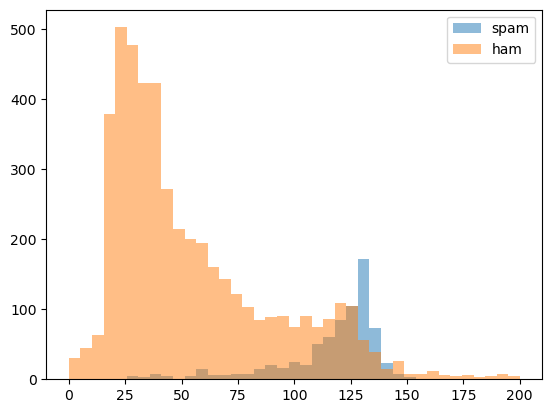

In [75]:
bins = np.linspace(0,200,40)
plt.hist(dataset[dataset['label']=='spam']['Content_len'],bins,alpha=0.5,label="spam")
plt.hist(dataset[dataset['label']=='ham']['Content_len'],bins,alpha=0.5,label="ham")
plt.legend(loc="upper right")
plt.show()

On remarque que la plupart des emails qui contient plus de 100 caractères sont des spam

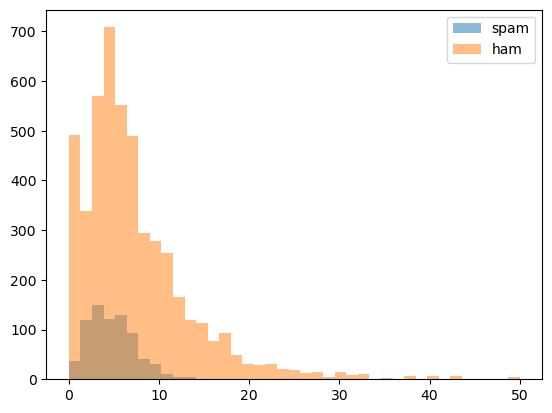

In [76]:
bins = np.linspace(0,50,40)
plt.hist(dataset[dataset['label']=='spam']['punctuation_rate'],bins,alpha=0.5,label="spam")
plt.hist(dataset[dataset['label']=='ham']['punctuation_rate'],bins,alpha=0.5,label="ham")
plt.legend(loc="upper right")
plt.show()

#### Le taux de ponctuation n'influence pas sur la nature de l'email

## Comprendre l'expérience du machine learning

In [77]:
dataset.shape

(5574, 9)

## K-Fold

Elle repose sur l'itération du scénario de splitting plusieurs fois en faisant varier les données d'entrainement et de test. La performance du modèle sera la moyenne des performances obtenues

### Matrice de confusion

Il faut déterminer les cas positifs. Dans notre exemple, un cas positif est un email $spam$

### Mésures de performance

- Le recall = $\dfrac{VP}{VP+FN}$

le rapport entre les cas qui sont réellement positifs ( qui sont des spam ) et la totalité des cas réellement positifs (vrai spam faux ham) 
elle correspond au taux de cas positifs repéré par le modèle

- La précision = $\dfrac{VP}{VP+FP}$

Le rapport entre les vrais spam et la somme des vrais spam et des faux spam
Elle renseigne sur le taux de vrais positifs détectés

## Modélisation

Nous allons implémenter l'algorithme SVM


In [125]:
""" Utilisation des données vectorisées avec le CountVectorizer et on crée un dataset
contenant les emails vectorisé et les variables ajoutées ( longueur et taux de ponctutation)
"""
all_data = pd.concat([pd.DataFrame(vect_final.toarray()),
                      dataset['Content_len'],
                      dataset['punctuation_rate']],axis=1)

In [126]:
all_data

,0,1,2,3,4,5,6,7,8,9,...,11101,11102,11103,11104,11105,11106,11107,11108,Content_len,punctuation_rate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,92,9.78
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24,25.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,128,4.69
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39,15.38
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,132,6.06
5570,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,30,3.33
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,48,14.58
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,1.00


In [127]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [128]:
## Split les données en données d'entrainement et de test
X_train,X_test,y_train,y_test = train_test_split(all_data,dataset['label'],test_size=.2)

In [129]:
## Import du modèle svm
from sklearn import svm

alg_svm = svm.SVC(kernel="linear")

In [130]:
## entrainement du modèle
alg_svm.fit(X_train,y_train)

C:\Users\NEFERTITI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVC(kernel='linear')

In [131]:
%%time
preds = alg_svm.predict(X_test)

C:\Users\NEFERTITI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


CPU times: total: 13.3 s
Wall time: 7.78 s


In [132]:
len(preds)

1115

In [135]:
precision,recall,fscore,_ = score(y_test,preds,pos_label="spam",average='binary')

In [144]:
print(f"Precision : {precision*100:.2f} %\nRecall: {recall*100:.2f}% \nAccuracy : {fscore*100:.2f}%")

Precision : 96.58 %
Recall: 90.38% 
Accuracy : 93.38%


## Cross-validation

cherchons les performances globale du modèle

In [ ]:
%%time
from sklearn.model_selection import KFold,cross_val_score

svm_with_cross_val = svm.SVC(kernel='linear')

""" Séparation des données en 4 groupes (3 pour l'entrainement et 1 pour le test). On se concentre donc sur la mesure globale.
le paramètre n_jobs permet de vérifier s'il est possible de faire du parallélisme alors on fait les quatre exécution en même temps
"""


k_fold = KFold(n_splits=4)
cross_val_score(svm_with_cross_val,all_data,dataset['label'],cv=k_fold,scoring='accuracy',n_jobs=-1)